# 선형 회기 : Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

### 단순 선형 회기 

$$
y = ax + b
$$

$a$ 는 기울기, $b$는 절편

In [15]:
#기울기가 2이고 절편이 -5인 선 주변에 흩어져 있는 데이터를 생각해보자
rng = np.random.RandomState(1)
noise = 10 * rng.rand(100)
x = np.linspace(-10,10,100)
a, b = 2, -5
y = a * x - b + noise

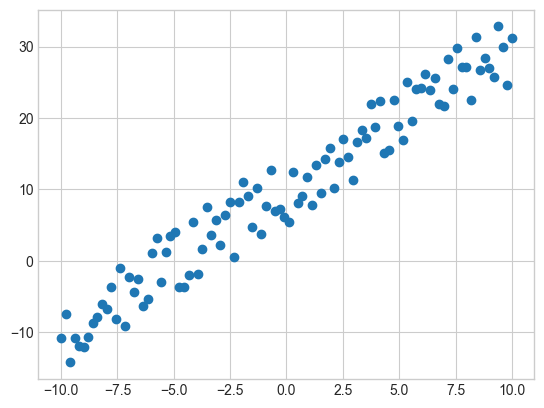

In [16]:
plt.scatter(x, y)

Scikit-Learn의 `LinearRegression` 추정기를 사용해 이 데이터를 적합시키고 가장 잘 적합하는 선을 구성할 수 있다

###### **(fit_intercept=True)** 의 의미? 절편을 포함한다. 즉, ax+b / false이면 절편 포함 X. 즉, ax

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
# model.fit(x.reshape(-1,1), y)

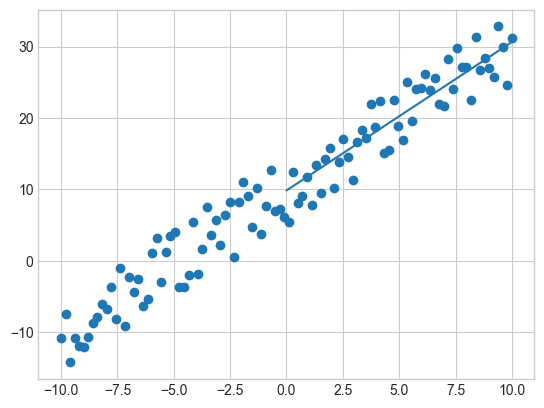

In [ ]:
new_x = np.linspace(0, 10, 100)
new_y = model.predict(new_x[:,np.newaxis])

plt.scatter(x, y)
plt.plot(new_x, new_y);

In [20]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0776667572152614
Model intercept: 9.858779276001455


우리가 바라던대로 입력값과 매우 가까운 결과를 얻었다

그러나 LinearRegression 추정기는 이보다 훨씬 더 많은 일을 할 수 있다. 단순한 직선 적ㅎ바 외에 다음 형태의 다차원 직선 모델도 처리할 수 있다.

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

여기에서는 여러개의 x값이 있는데 기하학적으로 이것은 평면을 3차원 점에 적합시키거나 초평면을 그보다 높은 차원의 점에 적합시키는 것과 유사하다.

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
#np.dot : 두 배열의 행렬 곱을 계산하는 함수

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


### 기저 함수 회기 Basic Function Regression


multidimensional linear model (다차원 선형 모델):
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$

이때 데이터를 변환하는 함수인 $f_n()$ 가, $f_n(x) = x^n$ 라면 다음과 같은 다항식 회기 모델(polynomial regression)이 된다.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

#### 다항식 기저 함수 Polynomial Basis Functions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly_model = PolynomialFeatures(3, include_bias=False)
poly_model

PolynomialFeatures()

In [ ]:
poly_model.fit_transform(x[:,np.newaxis])
# fit : 데이터를 학습하여 변환 규칙 설정
# fit_transform : 데이터를 학습하고 변환까지 수행

array([[1., 2., 4.],
       [1., 3., 9.]])

7차 다항식 모델을 만들어본다

In [29]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

In [30]:
x.shape, y.shape

((50,), (50,))

In [32]:
poly_model = PolynomialFeatures(7, include_bias=False)
poly_model.fit(x.reshape(-1,1),y)

PolynomialFeatures(degree=7, include_bias=False)

In [33]:
transformed_x = poly_model.transform(x.reshape(-1,1))
transformed_x.shape

(50, 7)

In [35]:
model = LinearRegression()
model.fit(transformed_x, y)
model.coef_, model.intercept_

(array([ 3.31250195e-01,  1.28845778e+00, -1.06474496e+00,  2.90659230e-01,
        -3.57011703e-02,  2.01614685e-03, -4.20513337e-05]),
 np.float64(0.02847262424530206))

이 과정을 한번에 하는 것

In [42]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [43]:
poly_model.fit(x.reshape(-1,1),y)
new_x = np.linspace(0, 10, 1000)
new_y = poly_model.predict(new_x[:, np.newaxis])

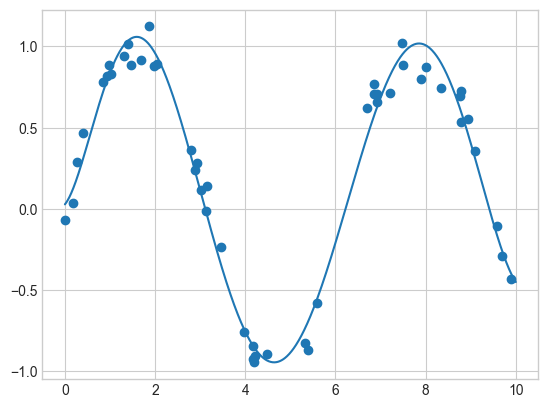

In [44]:
plt.scatter(x, y)
plt.plot(new_x, new_y);